In [333]:
# setup
import warnings
warnings.filterwarnings('ignore')
import numpy as np
import pandas as pd
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn; seaborn.set()  # set plot style
rand = np.random.RandomState(42)
from pandas.tools.plotting import andrews_curves, parallel_coordinates
plt.style.use('ggplot')

Load Data Files
==

![Alt text](data description.JPG)

In [334]:
# read files
data = pd.read_csv('training (1).csv')
test = pd.read_csv('testingCandidate (1).csv')
data.head()

,custAge,profession,marital,schooling,default,housing,loan,contact,month,day_of_week,...,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,pmonths,pastEmail,responded,profit,id
0,49.0,self-employed,married,basic.9y,no,yes,no,telephone,may,thu,...,1.1,93.994,-36.4,4.860,5191.0,999.0,0,no,NaN,1
1,NaN,housemaid,married,professional.course,no,no,no,cellular,jul,tue,...,1.4,93.918,-42.7,4.961,5228.1,999.0,0,no,NaN,2
2,45.0,management,divorced,university.degree,no,no,no,cellular,apr,tue,...,-1.8,93.075,-47.1,1.453,5099.1,999.0,0,no,NaN,3
3,44.0,blue-collar,married,basic.4y,unknown,no,no,telephone,may,thu,...,1.1,93.994,-36.4,4.855,5191.0,999.0,0,no,NaN,4
4,38.0,blue-collar,married,NaN,no,no,no,cellular,nov,mon,...,-0.1,93.200,-42.0,4.191,5195.8,999.0,0,no,NaN,5


In [335]:
# check column types
data.dtypes

custAge           float64
profession         object
marital            object
schooling          object
default            object
housing            object
loan               object
contact            object
month              object
day_of_week        object
campaign            int64
pdays               int64
previous            int64
poutcome           object
emp.var.rate      float64
cons.price.idx    float64
cons.conf.idx     float64
euribor3m         float64
nr.employed       float64
pmonths           float64
pastEmail           int64
responded          object
profit            float64
id                  int64
dtype: object

In [336]:
# check dimension of data
data.shape

(8238, 24)

Data Preprocessing - Missing Data Imputation
==

In [337]:
# drop unused columns
data.drop('id',axis=1,inplace=True)

In [338]:
data.isnull().any()

custAge            True
profession        False
marital           False
schooling          True
default           False
housing           False
loan              False
contact           False
month             False
day_of_week        True
campaign          False
pdays             False
previous          False
poutcome          False
emp.var.rate      False
cons.price.idx    False
cons.conf.idx     False
euribor3m         False
nr.employed       False
pmonths           False
pastEmail         False
responded         False
profit             True
dtype: bool

There is missingness in column `custAge`, `schooling` and `day_of_week`. Let's look into those columns to figure it out.

### impute `custAge`

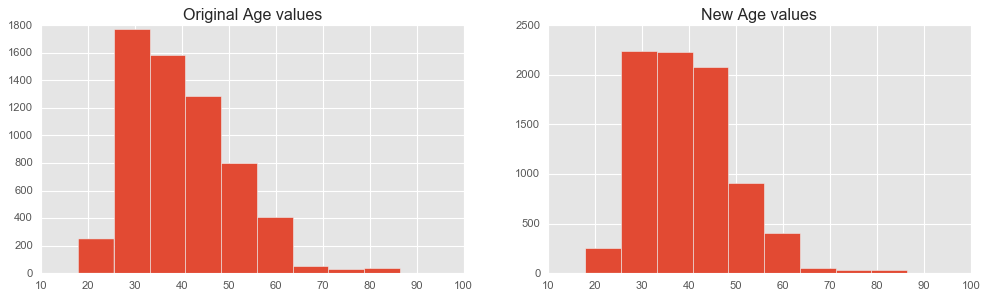

In [339]:
fig, (axis1,axis2) = plt.subplots(1,2,figsize=(15,4))
axis1.set_title('Original Age values')
axis2.set_title('New Age values')

average_age   = data['custAge'].mean()
std_age      = data['custAge'].std()
count_nan_age = data['custAge'].isnull().sum()

rand_1 = np.random.randint(average_age - std_age, average_age + std_age, size = count_nan_age)

# plot original Age values
# NOTE: drop all null values, and convert to int
data['custAge'].dropna().astype(int).hist(ax=axis1)

# fill NaN values in Age column with random values generated
data['custAge'][np.isnan(data['custAge'])] = rand_1

# convert from float to int
data['custAge'] = data['custAge'].astype(int)
        
# plot new Age Values
data['custAge'].hist(ax=axis2);

### impute `schooling`

In [340]:
data['schooling'].unique()

array(['basic.9y', 'professional.course', 'university.degree', 'basic.4y',
       nan, 'high.school', 'basic.6y', 'unknown', 'illiterate'], dtype=object)

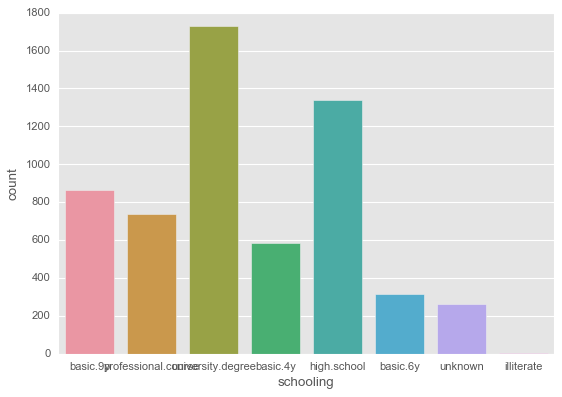

In [341]:
sns.countplot(x="schooling", data=data);

In [342]:
data['schooling'].fillna('unknown',inplace=True)

### impute `day_of_week`
Since the distribution of `day_of_week` is quite uniform. We won't use the most frequent `day_of_week` to impute missing values. Instead, we replace `NaN` with `unknown`.

In [343]:
data['day_of_week'].unique()

array(['thu', 'tue', 'mon', 'fri', 'wed', nan], dtype=object)

In [344]:
data['day_of_week'].fillna('unknown',inplace=True)

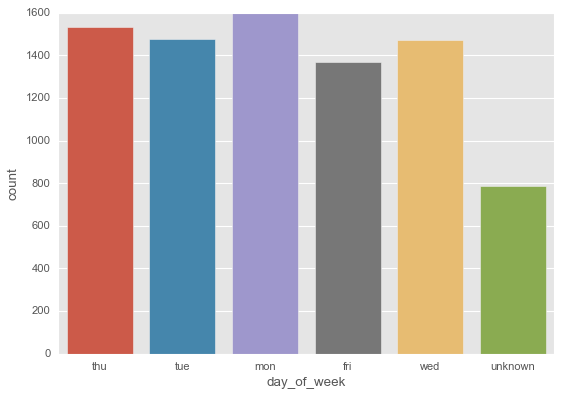

In [345]:
sns.countplot(x="day_of_week", data=data);

In [346]:
### make categorical data astype `category`
cat = ['profession', 'marital', 'schooling', 'default', 'housing', 'loan', 'contact', 'month', 'day_of_week', 'poutcome', 'responded']
for col in cat:
    data[col] = data[col].astype('category')

Exploritory Data Analysis
==

## target variables

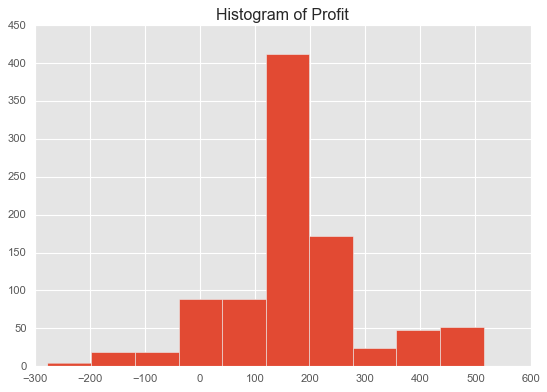

In [347]:
plt.hist(data['profit'].dropna())
plt.title('Histogram of Profit');

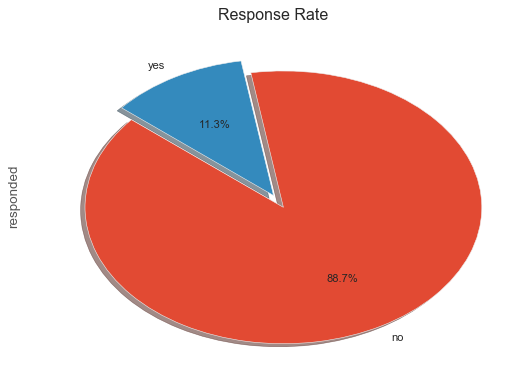

In [348]:
data['responded'].value_counts().plot(kind='pie',explode=[0.1,0],
        autopct='%1.1f%%', shadow=True, startangle=140)
plt.title('Response Rate')

# demographic

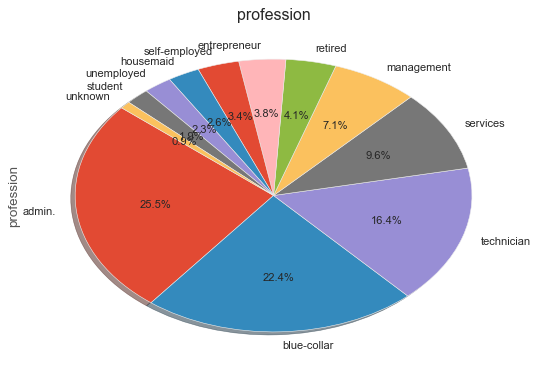

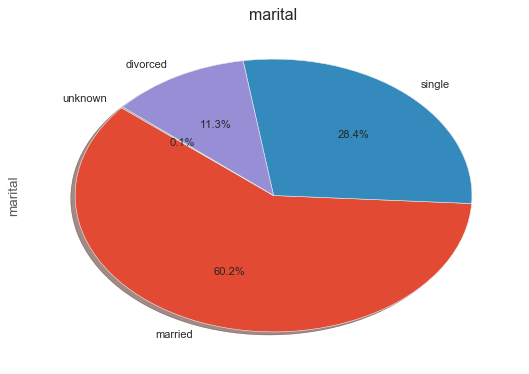

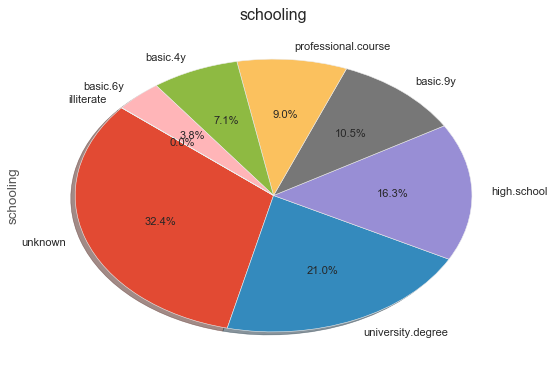

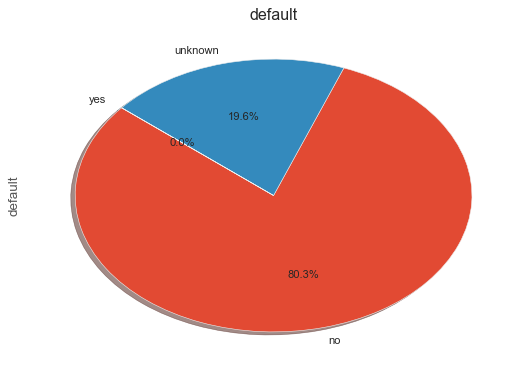

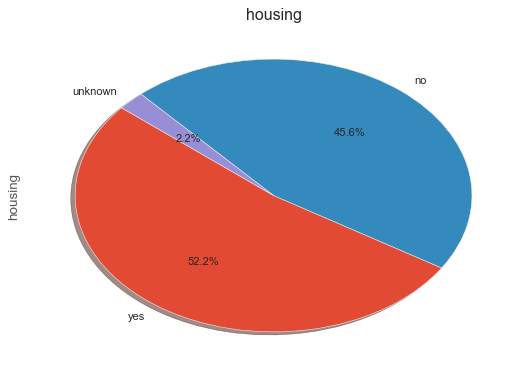

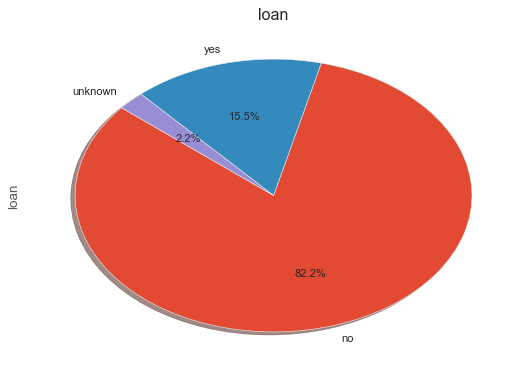

In [349]:
demo = ['profession', 'marital', 'schooling', 'default', 'housing', 'loan']

for col in demo:
    plt.figure()
    data[col].value_counts().plot(kind='pie',
        autopct='%1.1f%%', shadow=True, startangle=140)
    plt.title(col)

array([<matplotlib.axes._subplots.AxesSubplot object at 0x130b11588>,
       <matplotlib.axes._subplots.AxesSubplot object at 0x13112ddd8>], dtype=object)

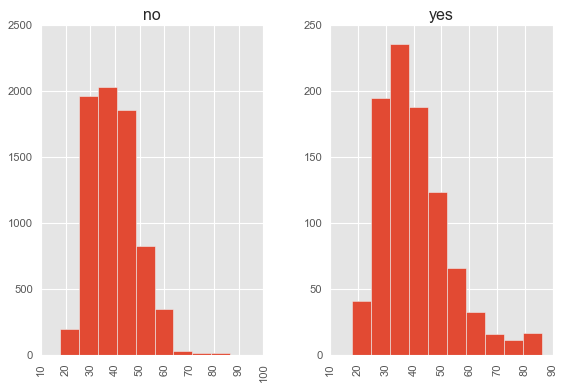

In [350]:
data['custAge'].hist(by=data['responded'])

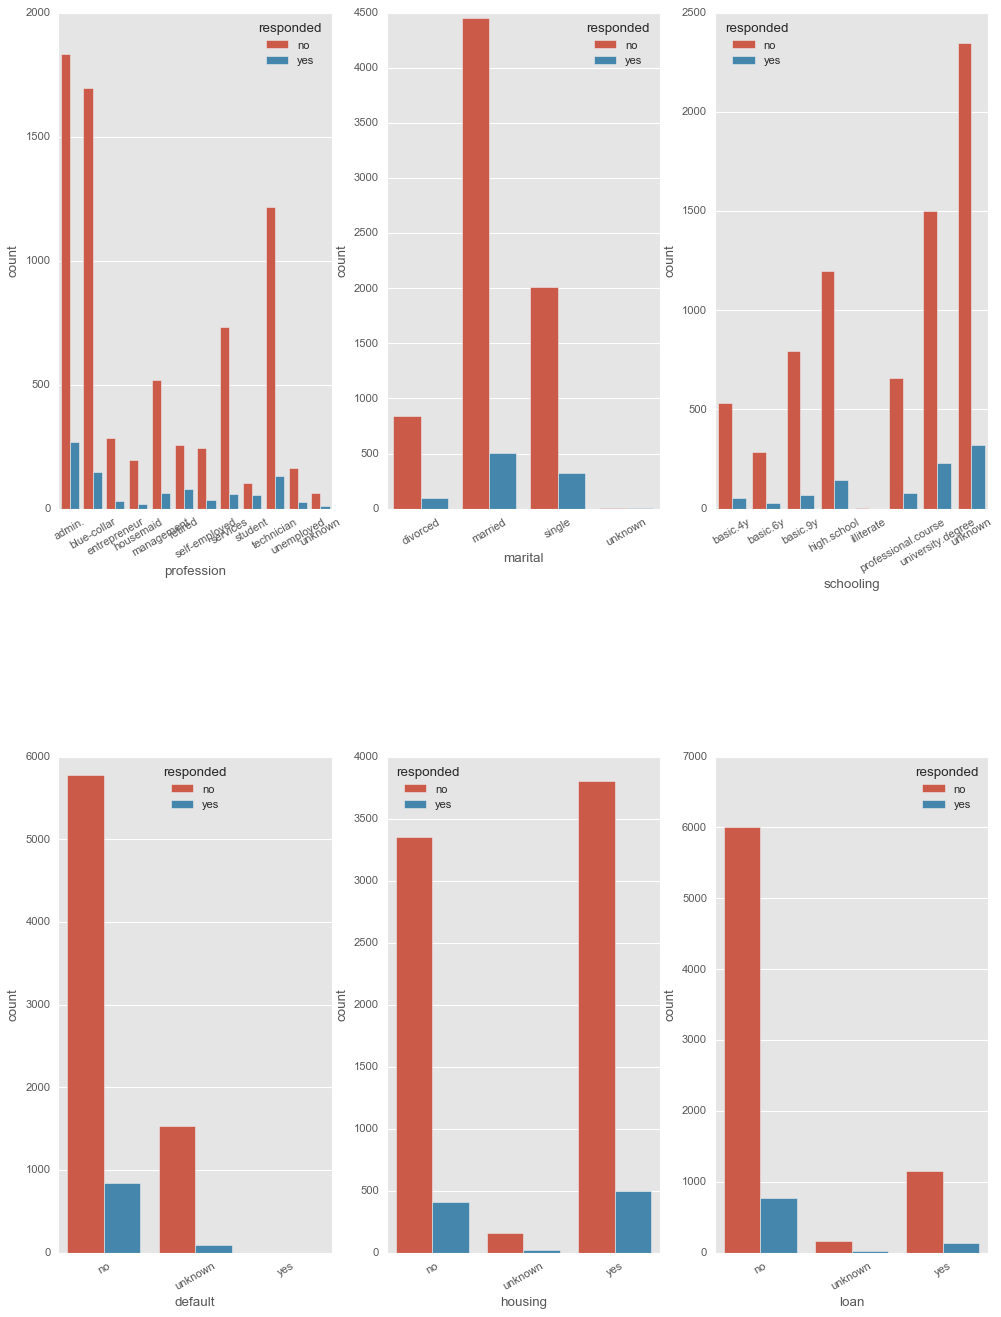

In [351]:
fig, axs = plt.subplots(2, 3, figsize=(15, 20), facecolor='w', edgecolor='k')
fig.subplots_adjust(hspace = .5, wspace=.2)

axs = axs.ravel()

for i,col in enumerate(demo):
    g = sns.countplot(hue="responded", x=col,data=data,ax=axs[i])
    axs[i].set_xticklabels(axs[i].get_xticklabels(), rotation = 30)

## Economic

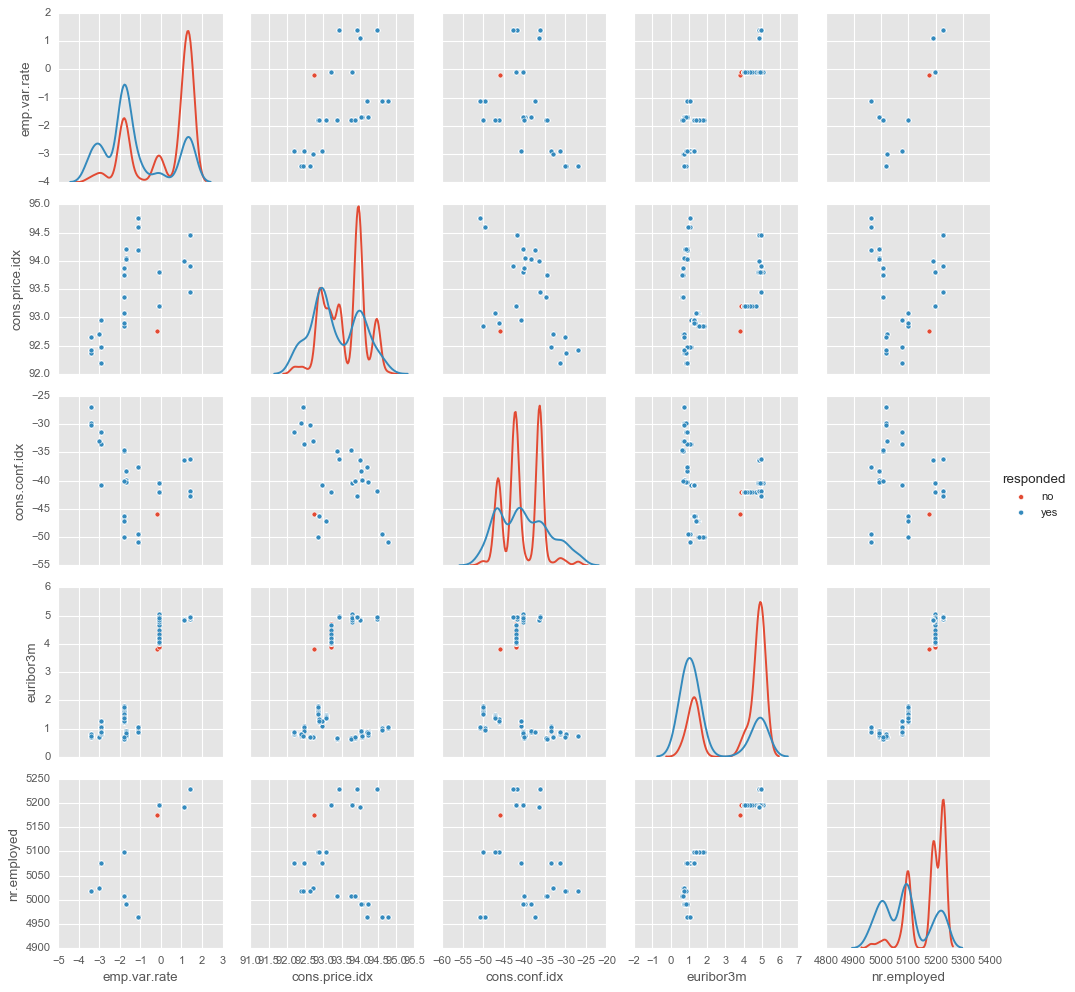

In [352]:
eco = ['emp.var.rate', 'cons.price.idx', 'cons.conf.idx', 'euribor3m', 'nr.employed', 'responded']
sns.pairplot(data[eco], hue='responded',  diag_kind="kde")

## Campaign

In [353]:
camp1 = ['campaign', 'pdays',
       'previous', 'pmonths', 'pastEmail']
camp2 = ['contact', 'month', 'day_of_week','poutcome']

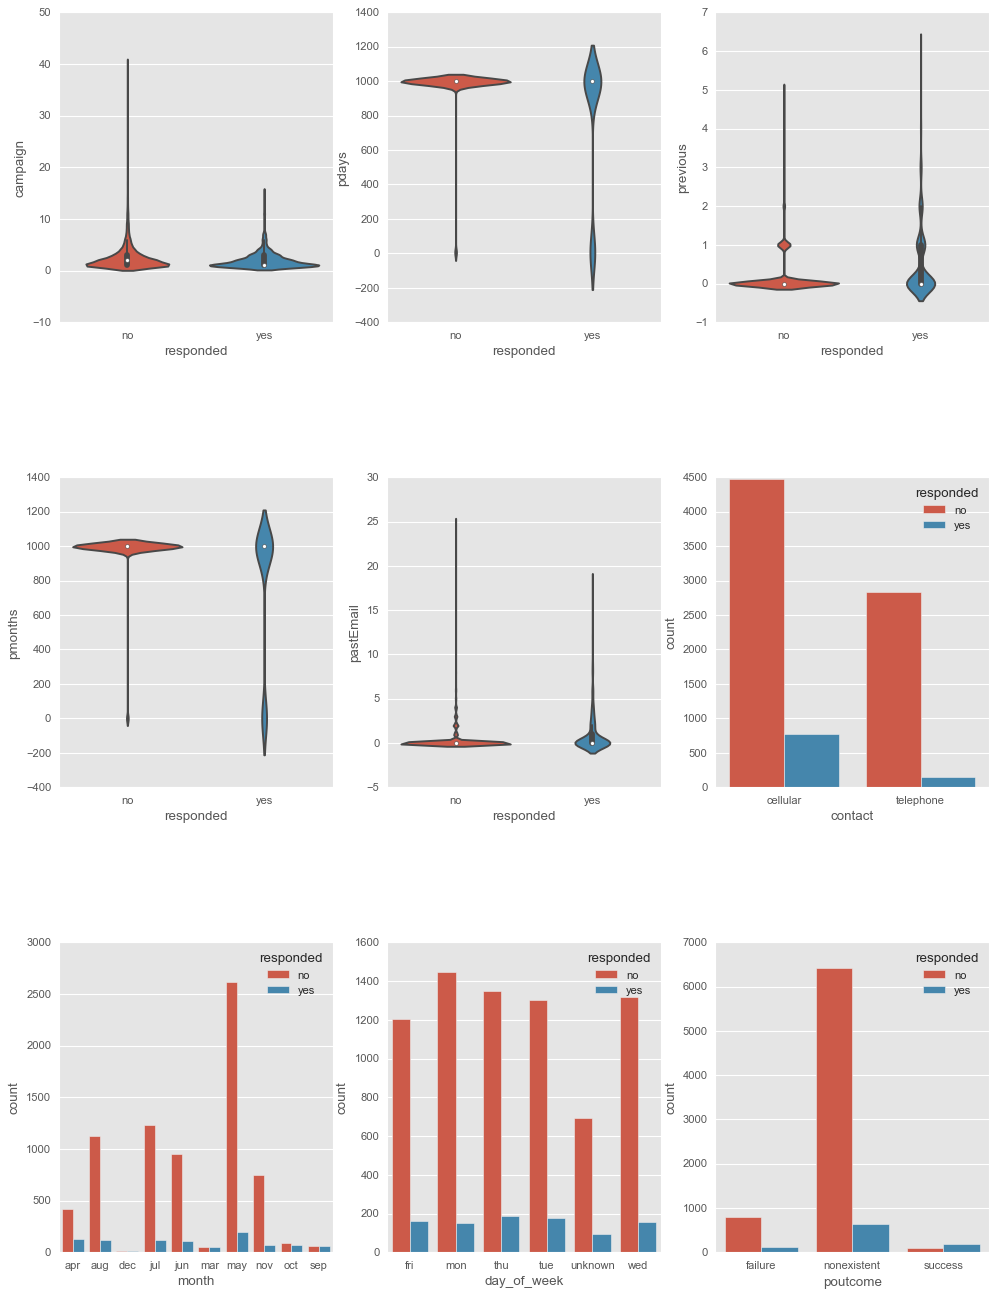

In [354]:
fig, axs = plt.subplots(3, 3, figsize=(15, 20), facecolor='w', edgecolor='k')
fig.subplots_adjust(hspace = .5, wspace=.2)

axs = axs.ravel()

for i,col in enumerate(camp1):
    sns.violinplot(x=data.responded, y=data[col],ax=axs[i]);
for i,col in enumerate(camp2):
    sns.countplot(hue=data.responded, x=data[col],ax=axs[i+5]);

## Correlation

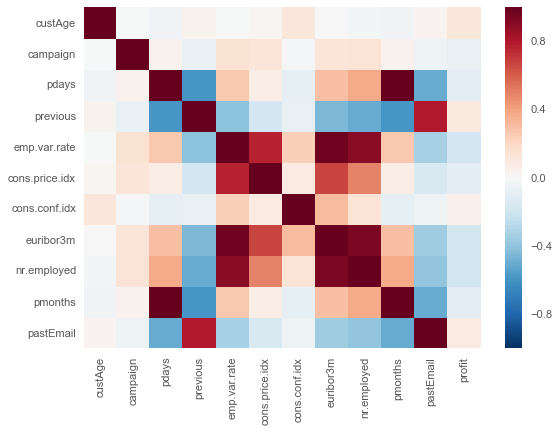

In [355]:
sns.heatmap(data.corr().drop('profit'),annot_kws=True);

The plot on response variable shows highly unbalanced distribution of its binary classes. The relationships between the economic data are non-linear. Economic data is not normally distributed. In order to fit machine learning algorithms, all the categorical variables and response variable are encoded into numerical levels.

Data Preprocessing - Standardize
==

In [356]:
from sklearn.preprocessing import StandardScaler

In [357]:
X, responded, profit = data.ix[:, :-2], data.ix[:, -2], data.ix[:, -1]

In [358]:
X_num = X[X.columns.drop(cat[:-1])]
X_cat = X[cat[:-1]]

In [359]:
X_scaled = DataFrame(StandardScaler().fit_transform(X_num), columns=X_num.columns)

Data Preprocessing - Numerical mapping for categorical data
==

In [360]:
X_cat = pd.get_dummies(X_cat)

In [361]:
X_clean = pd.concat([X_cat,X_scaled],axis=1)

Dimension Reduction
==

In [362]:
from sklearn.decomposition import PCA
pca = PCA()
data_scaled_pca = DataFrame(pca.fit_transform(X_clean), columns=X_clean.columns)

v = pca.explained_variance_ratio_
vc = v.cumsum()
DataFrame(list(zip(it.count(), v, vc)), columns=['pc', 'explained', 'cumsum']).head(10)

,pc,explained,cumsum
0,0,0.283695,0.283695
1,1,0.131639,0.415334
2,2,0.069958,0.485293
3,3,0.061127,0.546420
4,4,0.055967,0.602387
5,5,0.047392,0.649779
6,6,0.042314,0.692093
7,7,0.028971,0.721064
8,8,0.024112,0.745176
9,9,0.018403,0.763580


In [363]:
n_comps = 1 + np.argmax(vc > 0.95) 

data_scaled_pca = data_scaled_pca.ix[:, :n_comps]

In [364]:
sub = data.responded=='yes'

In [365]:
data2_scaled_pca = data_scaled_pca.ix[sub, :n_comps]
profit = profit[sub]

Modeling
==
# Response Rate

In [366]:
from sklearn.cross_validation import train_test_split

In [367]:
X_train, X_test, y_train, y_test = \
  train_test_split(data_scaled_pca, responded, test_size=0.33, random_state=42)

In [368]:
from sklearn.metrics import classification_report

### Logistic Regression

In [369]:
from sklearn.linear_model import LogisticRegression
lr = LogisticRegression()
lr.fit(X_train, y_train)
lr.score(X_test, y_test)

0.90327326222876059

In [370]:
y_true, y_pred = y_test, lr.predict(X_test)
print(classification_report(y_true, y_pred), '\n','Accuracy score', lr.score(X_test, y_test))

             precision    recall  f1-score   support

         no       0.91      0.99      0.95      2421
        yes       0.70      0.21      0.32       298

avg / total       0.89      0.90      0.88      2719
 
 Accuracy score 0.903273262229


### Using Support Vector Machine

In [371]:
from sklearn.svm import SVC

svm = SVC(kernel='rbf', C=1E6)
svm.fit(X_train, y_train.codes)
pass
svm.score(X_test, y_test.codes)

0.81978668628172124

In [372]:
y_true, y_pred = y_test.codes, svm.predict(X_test)
print(classification_report(y_true, y_pred), '\n','Accuracy score', svm.score(X_test, y_test.codes))

             precision    recall  f1-score   support

          0       0.91      0.88      0.90      2421
          1       0.24      0.30      0.27       298

avg / total       0.84      0.82      0.83      2719
 
 Accuracy score 0.819786686282


## Random Forest

In [373]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.grid_search import GridSearchCV
X_train, X_test, y_train, y_test = \
  train_test_split(X_clean, responded, test_size=0.33, random_state=42)
rf = RandomForestClassifier()
rf.fit(X_train, y_train.codes)
pass


In [374]:
y_true, y_pred = y_test.codes, rf.predict(X_test)
print(classification_report(y_true, y_pred), '\n','Accuracy score', rf.score(X_test, y_test.codes))

             precision    recall  f1-score   support

          0       0.91      0.98      0.94      2421
          1       0.58      0.24      0.34       298

avg / total       0.88      0.90      0.88      2719
 
 Accuracy score 0.897756528135


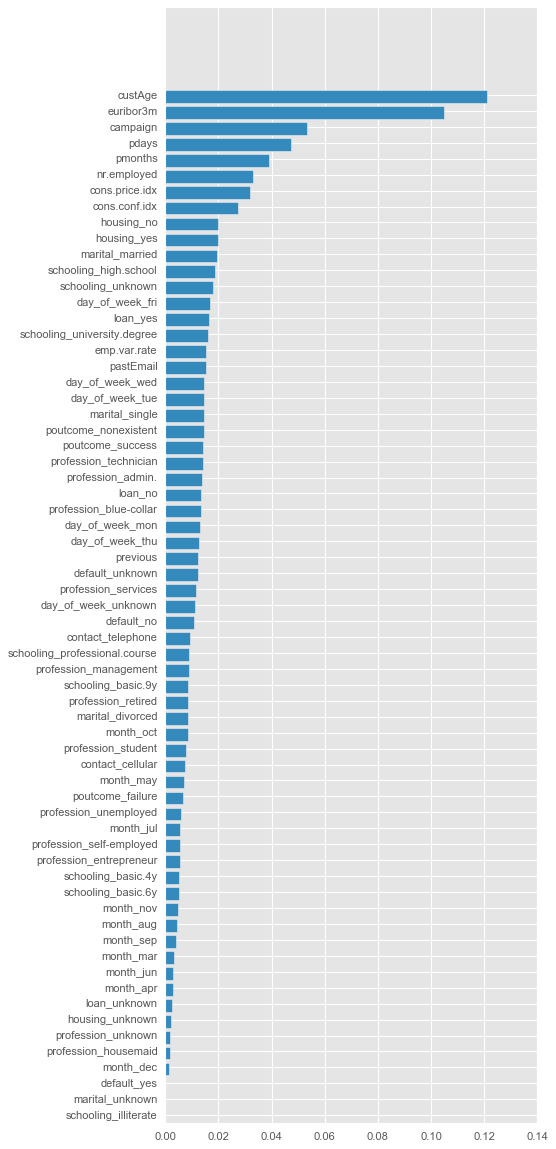

In [410]:
imp = rf.feature_importances_
idx = np.argsort(imp)


#most important feature
plt.figure(figsize=(6, 18))
plt.barh(range(len(imp)), imp[idx])
plt.yticks(np.arange(len(imp))+0.5, X_clean.columns[idx])
pass

In [414]:
#TOP 10 improtant feature
X_clean.columns[idx[-10:]]

Index(['housing_yes', 'housing_no', 'cons.conf.idx', 'cons.price.idx',
       'nr.employed', 'pmonths', 'pdays', 'campaign', 'euribor3m', 'custAge'],
      dtype='object')

## Naive Bayes

In [295]:
from sklearn.naive_bayes import GaussianNB 
nb = GaussianNB()
nb.fit(X_train, y_train)

nb.score(X_test, y_test)

0.86686281721221037

In [296]:
y_true, y_pred = y_test, nb.predict(X_test)
print(classification_report(y_true, y_pred), '\n','Accuracy score', nb.score(X_test, y_test))

             precision    recall  f1-score   support

         no       0.92      0.93      0.93      2421
        yes       0.38      0.35      0.36       298

avg / total       0.86      0.87      0.86      2719
 
 Accuracy score 0.866862817212


# Profit

In [297]:
X_train, X_test, y_train, y_test = \
  train_test_split(data2_scaled_pca, profit, test_size=0.33, random_state=42)
rf2 = RandomForestClassifier()
rf2.fit(X_train, y_train)
pass

In [298]:
y_true, y_pred = y_test, rf2.predict(X_test)
np.mean((y_true-y_pred)**2)

29268.055374592834

# Lasso

In [299]:
from sklearn import linear_model
lasso = linear_model.Lasso(alpha=0.1)
lasso.fit(X_train, y_train)

Lasso(alpha=0.1, copy_X=True, fit_intercept=True, max_iter=1000,
   normalize=False, positive=False, precompute=False, random_state=None,
   selection='cyclic', tol=0.0001, warm_start=False)

In [300]:
y_true, y_pred = y_test, lasso.predict(X_test)
np.mean((y_true-y_pred)**2)

2413.881919715904

Predicting
==

In [304]:
test.drop('id',axis=1,inplace=True)

In [305]:
def impute(data):
    average_age   = data['custAge'].mean()
    std_age      = data['custAge'].std()
    count_nan_age = data['custAge'].isnull().sum()

    rand_1 = np.random.randint(average_age - std_age, average_age + std_age, size = count_nan_age)

    # fill NaN values in Age column with random values generated
    data['custAge'][np.isnan(data['custAge'])] = rand_1

    # convert from float to int
    data['custAge'] = data['custAge'].astype(int)
    data['schooling'].fillna('unknown',inplace=True)
    data['day_of_week'].fillna('unknown',inplace=True)
    return data
X = test
X = impute(X)
X_num = X[X.columns.drop(cat[:-1])]
X_cat = X[cat[:-1]]
X_scaled = DataFrame(StandardScaler().fit_transform(X_num), columns=X_num.columns)
X_cat = pd.get_dummies(X_cat)
X_clean = pd.concat([X_cat,X_scaled],axis=1)
pca = PCA()
data_scaled_pca = DataFrame(pca.fit_transform(X_clean), columns=X_clean.columns)

v = pca.explained_variance_ratio_
vc = v.cumsum()
data_scaled_pca = data_scaled_pca.ix[:, :27]

In [306]:
responded_test = lr.predict_proba(data_scaled_pca)

In [307]:
profit_test = lasso.predict(data_scaled_pca)

In [308]:
target = responded_test[:,1]*profit_test > 30

In [309]:
target_or_not = list(map(lambda x: 'yes' if x else 'no', target))

In [310]:
test = pd.concat([test, pd.DataFrame(target_or_not, columns=['target_or_not'])],axis=1)


In [311]:
test.to_csv("testingCandidate (1).csv")